## PCA on AA triplets - CELIAC MODEL
#### 8.5.18

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics

In [2]:
%cd /media/miri-o/Documents/

import biovec
CDR3_cropped_model = biovec.models.load_protvec('trained_models/CDR3_model_Celiac_based_20180506.txt')

/media/miri-o/Documents


In [3]:
# take 8000 3-grams and map them the same way
import itertools
n = 3
prot_ngrams = [list(n) for n in itertools.product('ACDEFGHIKLMNPQRSTVWY', repeat = n)]
prot_ngrams = [''.join(ngram) for ngram in prot_ngrams]

In [5]:
prot_ngram_vecs = {}
prot_ngram_vecs = prot_ngram_vecs.fromkeys(prot_ngrams, 0)

for ngram in prot_ngrams:
    try:
        prot_ngram_vecs[ngram] = list(CDR3_cropped_model.to_vecs(ngram)[0])
    except:
        print('Could not convert ngram: ', ngram) 
    

In [8]:
prot_ngrams_df = pd.DataFrame(prot_ngram_vecs)
prot_ngrams_array = np.transpose(prot_ngrams_df.values)

In [9]:
vec_embedded_8000 = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(prot_ngrams_array)

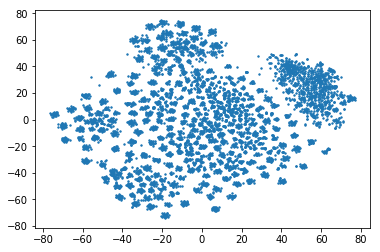

In [10]:
plt.scatter(vec_embedded_8000[:,0], vec_embedded_8000[:,1], s=2)
#create a grid to sperate the points   
plt.show()

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa


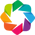

In [11]:
import holoviews as hv
hv.extension('bokeh')

In [12]:
vec_info = {'dim1':vec_embedded_8000[:,0], 'dim2':vec_embedded_8000[:,1]}
scatter = hv.Scatter(vec_info, 'dim1', 'dim2')
scatter

:Scatter   [dim1]   (dim2)

In [13]:
# read n-grams with properties (created by alakazm) to data frame
ngrams_properties = pd.read_csv("prot_ngrams_properties.csv")
ngrams_properties['dim1'] = vec_embedded_8000[:,0]
ngrams_properties['dim2'] = vec_embedded_8000[:,1]
ngrams_properties.head()

Unnamed: 0 Ngram  CDR3_AA_GRAVY  CDR3_AA_BULK  CDR3_AA_ALIPHATIC  \
0           1   AAA       1.800000     11.500000           1.000000   
1           2   AAC       2.033333     12.153333           0.666667   
2           3   AAD       0.033333     11.560000           0.666667   
3           4   AAE       0.033333     12.190000           0.666667   
4           5   AAF       2.133333     14.266667           0.666667   

   CDR3_AA_POLARITY  CDR3_AA_CHARGE  CDR3_AA_BASIC  CDR3_AA_ACIDIC  \
0          8.100000        0.000000            0.0        0.000000   
1          7.233333       -0.073588            0.0        0.000000   
2          9.733333       -0.999684            0.0        0.333333   
3          9.500000       -0.999499            0.0        0.333333   
4          7.133333        0.000000            0.0        0.000000   

   CDR3_AA_AROMATIC       dim1       dim2  
0          0.000000   3.529037  17.009605  
1          0.000000  56.743832  25.561583  
2          0.000000   5.753068  10.072605  
3          0.000000  20.332609 -37.354755  
4          0.333333   8.066831   9.876408

In [14]:
ngrams_properties['group'] = np.random.randint(0,3,len(ngrams_properties['dim2']))
ngrams_properties['group'] = [str(i) for i in ngrams_properties['group']]
ngrams_properties.head()

Unnamed: 0 Ngram  CDR3_AA_GRAVY  CDR3_AA_BULK  CDR3_AA_ALIPHATIC  \
0           1   AAA       1.800000     11.500000           1.000000   
1           2   AAC       2.033333     12.153333           0.666667   
2           3   AAD       0.033333     11.560000           0.666667   
3           4   AAE       0.033333     12.190000           0.666667   
4           5   AAF       2.133333     14.266667           0.666667   

   CDR3_AA_POLARITY  CDR3_AA_CHARGE  CDR3_AA_BASIC  CDR3_AA_ACIDIC  \
0          8.100000        0.000000            0.0        0.000000   
1          7.233333       -0.073588            0.0        0.000000   
2          9.733333       -0.999684            0.0        0.333333   
3          9.500000       -0.999499            0.0        0.333333   
4          7.133333        0.000000            0.0        0.000000   

   CDR3_AA_AROMATIC       dim1       dim2 group  
0          0.000000   3.529037  17.009605     0  
1          0.000000  56.743832  25.561583     2  
2          0.000000   5.753068  10.072605     1  
3          0.000000  20.332609 -37.354755     1  
4          0.333333   8.066831   9.876408     0

In [15]:
ngrams_properties['CDR3_AA_AROMATIC'].unique()

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

In [20]:
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.plotting import figure, show, output_file
from bokeh.models import Band, ColumnDataSource

source = ColumnDataSource(ngrams_properties)
p = figure(title='Blabla', x_range=Range1d(-80,80), y_range=Range1d(-80,80))
p.scatter(x='dim1', y='dim2', size=2, source=source)
p.xaxis[0].axis_label = 'dim1'
p.yaxis[0].axis_label = 'sim2'
labels = LabelSet(x='dim1', y='dim2', text='Ngram', level='glyph', text_font_size='5pt',
         x_offset=5, y_offset=5, source=source)
p.add_layout(labels)
show(p)

In [23]:
import datashader as ds

AttributeError: module 'numba' has no attribute 'ctypes_support'

In [22]:

import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import aggregate, shade, datashade, dynspread
from holoviews.operation import decimate
points = hv.Points((ngrams_properties['dim1'], ngrams_properties['dim2']))
#datashade(points) + dynspread(datashade(points))

AttributeError: module 'numba' has no attribute 'ctypes_support'

In [163]:
ngrams_properties['Ngram'][0]

'AAA'

In [21]:
%%opts Scatter (size=50)
kdims=['d1','d2']
num_ks=4
properties = ngrams_properties['CDR3_AA_AROMATIC'].unique()
by_group = {i: hv.Points((ngrams_properties['dim1'][ngrams_properties['CDR3_AA_AROMATIC']==properties[i]],
                         ngrams_properties['dim2'][ngrams_properties['CDR3_AA_AROMATIC']==properties[i]]), kdims) for i,prop in enumerate(properties)}
groupspread = dynspread(datashade(hv.HoloMap(by_group, kdims=['CDR3_AA_AROMATIC'])))
groupspread

NameError: name 'dynspread' is not defined

In [142]:
by_group[0]+by_group[1]+by_group[2]+by_group[3]

:Layout
   .Points.I   :Points   [d1,d2]
   .Points.II  :Points   [d1,d2]
   .Points.III :Points   [d1,d2]
   .Points.IV  :Points   [d1,d2]

In [146]:
%%opts Scatter (size=50)
kdims=['d1','d2']
num_ks=4
properties = ngrams_properties['CDR3_AA_ACIDIC'].unique()
by_group = {i: hv.Points((ngrams_properties['dim1'][ngrams_properties['CDR3_AA_ACIDIC']==properties[i]],
                         ngrams_properties['dim2'][ngrams_properties['CDR3_AA_ACIDIC']==properties[i]]), kdims) for i,prop in enumerate(properties)}
groupspread = dynspread(datashade(hv.HoloMap(by_group, kdims=['CDR3_AA_ACIDIC'])))
groupspread

:DynamicMap   [CDR3_AA_ACIDIC]

In [147]:
by_group[0]+by_group[1]+by_group[2]+by_group[3]

:Layout
   .Points.I   :Points   [d1,d2]
   .Points.II  :Points   [d1,d2]
   .Points.III :Points   [d1,d2]
   .Points.IV  :Points   [d1,d2]

In [ ]:
import codecs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mpld3
from sklearn.manifold import TSNE
from numpy import linalg as LA
%matplotlib inline
#mpld3.enable_notebook()



def visualize():
    
    # show 1000 words
    num_to_show = 1000
    # perform TSNE
    X_embedded = TSNE(n_components=2).fit_transform(dict_list_in_vecs)
    # plot the words vectors with their labels
    mpl.rcParams['figure.figsize'] = (12,12)
    mpl.rcParams.update({'font.size': 22})
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    for word, x, y in zip(words, X_embedded[:,0], X_embedded[:,1]):
        plt.annotate(word, xy=(x, y), xytext=(x,y), textcoords="data")
    plt.show()
    
    

In [ ]:
plt.scatter(vec_embedded_8000[:,0], vec_embedded_8000[:,1], s=5)
plt.xlim(-14, -10)
plt.ylim(45,55)
for word, x, y in zip(prot_ngrams, vec_embedded_8000[:,0], vec_embedded_8000[:,1]):
    plt.annotate(word, xy=(x, y), xytext=(x,y), textcoords="data")
plt.show()

In [ ]:
plt.scatter(vec_embedded_8000[:,0], vec_embedded_8000[:,1], s=5)
plt.xlim(-60, -52)
plt.ylim(-25,-32)
for word, x, y in zip(prot_ngrams, vec_embedded_8000[:,0], vec_embedded_8000[:,1]):
    plt.annotate(word, xy=(x, y), xytext=(x,y), textcoords="data")
plt.show()

In [ ]:
# Lt's compare this to PCA

In [ ]:
from sklearn.decomposition import PCA
pca_word2vec = PCA(n_components=10)
pca_result_word2vec = pca_word2vec.fit_transform(prot_ngrams_array)

In [ ]:
print('Explained variation per principal component: '+format(pca_word2vec.explained_variance_ratio_))

In [ ]:
print('All 10 component summation: ' + str(pca_word2vec.explained_variance_ratio_.sum()))

In [ ]:
# vectors are built as a summation of the 3-grams they are made of, for example:
CDR3_cropped_model.to_vecs('AAA')[0]+CDR3_cropped_model.to_vecs('CAA')[0]-CDR3_cropped_model.to_vecs('AAACAA')[0]

In [ ]:
import holoviews as hv
